In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# figures inline, ignore warnings, setting visualisation style, standardisation
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore") 
sns.set()

# algo libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score

In [3]:
# load datasets
train_proc=pd.read_csv("train_proc.csv")
test_proc = pd.read_csv("test_proc.csv")

In [4]:
# splitting from training and validation data
X = train_proc.drop("Survived", axis =1)
y = train_proc['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [5]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,-0.551881,1,0,-0.726134,False,True,True,False,True,False,True,False,False
1,0.768879,1,0,2.353815,False,False,False,False,False,False,False,True,False
2,-0.221691,0,0,-0.693667,False,True,False,False,True,True,False,False,False
3,0.521236,1,0,1.479214,False,False,False,False,True,False,False,True,False
4,0.521236,0,0,-0.687655,False,True,True,False,True,False,True,False,False


In [6]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
# applying logistic regression algorithm
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train.values.ravel())

LogisticRegression(random_state=0)

In [8]:
# cross validation score with random shuffling
kf=KFold(5, shuffle=True, random_state=10) #for shuffling
cross_val_results=cross_val_score(log_reg,X_train, y_train.values.ravel(),cv=kf)
print(cross_val_results)
print(cross_val_results.mean())

[0.84962406 0.7518797  0.84210526 0.79699248 0.8030303 ]
0.8087263613579403


In [9]:
# predictions on validation set and accuracy
predictions = log_reg.predict(X_test)
print(accuracy_score(y_test,predictions))

0.844311377245509


In [10]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
confusion_matrix(y_test,predictions)

array([[101,  12],
       [ 14,  40]], dtype=int64)

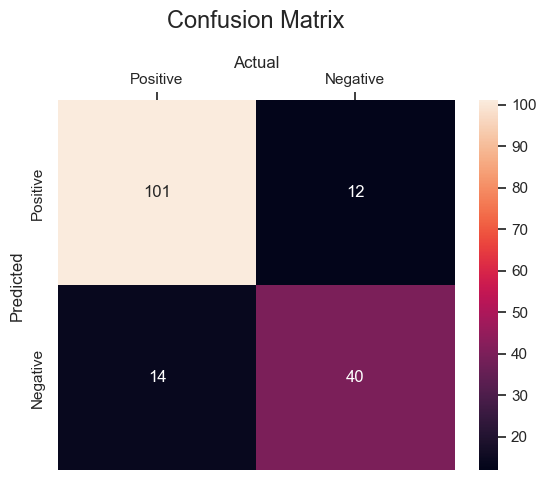

In [11]:
sns.heatmap(cm, 
            annot=True,
            fmt="d", 
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Predicted')
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.xlabel('Actual')
plt.show()

In [12]:
# roc-auc curve
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,threshold=roc_curve(y_test,y_pred_prob)
roc_auc_dt = auc(fpr_dt,tpr_dt)
print(roc_auc_dt)

0.8685676827269747


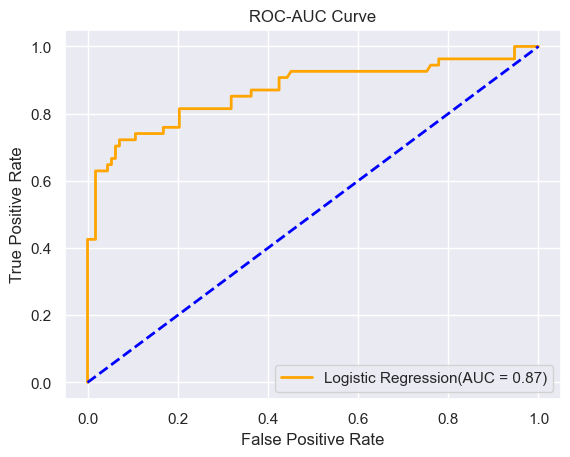

In [13]:
plt.figure()
plt.plot(fpr_dt,tpr_dt,color='orange',lw=2,label=f'Logistic Regression(AUC = {roc_auc_dt:.2f})')
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')

In [14]:
# classification_report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       113
           1       0.77      0.74      0.75        54

    accuracy                           0.84       167
   macro avg       0.82      0.82      0.82       167
weighted avg       0.84      0.84      0.84       167



In [15]:
# predictions on test data
predictions = log_reg.predict(test_proc)

# creating dataframe of test predictions with Passenger Id, uncomment after loading test file with Passenger Id
# prediction_df = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions})

# Save the predictions to a CSV file, uncomment to save file
# prediction_df.to_csv('prediction.csv', index=False)